In [13]:
from run import Runner
from mytorch.utils.goodies import FancyDict
from matplotlib import pyplot as plt
import numpy as np
import torch

args = {'name' : 'testrun',
'dataset' : 'RLF',
'model' : 'compgcn',
'score_func' : 'conve',
'opn' : 'corr',                 
'use_wandb' : False, 
'batch_size' : 128,       
'gamma' : 40.0,			
'gpu' : '-1',			
'max_epochs' : 1,  	
'l2' : 0.0,			
'lr' : 0.001,			
'lbl_smooth' : 0.1,	
'num_workers' : 10,                     
'seed' : 41504,     	
'restore' : False,            
'bias' : False   ,         
'num_bases' : -1, 	
'init_dim' : 100,	
'gcn_dim' : 200 ,	
'embed_dim' : None, 	
'gcn_layer' : 1 	,
'dropout' : 0.1	,
'hid_drop' : 0.3	,
'hid_drop2' : 0.3	,
'feat_drop' : 0.3	,
'k_w' : 10 	,
'k_h' : 20 	,
'num_filt' : 200, 	
'ker_sz' : 7 	,
'log_dir' : './log/',               
'config_dir' : './config/',
'trim': False,
'trim_ratio': 0.005,
'use_fasttext': False
}

args = FancyDict(args)


# # Temp; to test
# args.trim = True

model = Runner(args)

2023-07-19 15:37:23,067 - [INFO] - {}
2023-07-19 15:37:23,067 - [INFO] - {}
2023-07-19 15:37:23,067 - [INFO] - {}
2023-07-19 15:37:23,067 - [INFO] - {}
2023-07-19 15:37:23,067 - [INFO] - {}
{}


In [14]:
# # Now load the saved model
model.load_model('./checkpoints/compgcn-conve-rlffam')


In [15]:
# Do the predictions
left_pred, left_ranks = model.predict('valid', mode='tail_batch', report_all=True)
right_pred, right_ranks = model.predict('valid', mode='head_batch', report_all=True)

all_ranks = torch.cat([left_ranks, right_ranks], dim=0)

2023-07-19 15:37:26,949 - [INFO] - [Valid, Tail_Batch Step 0]	testrun
2023-07-19 15:37:26,949 - [INFO] - [Valid, Tail_Batch Step 0]	testrun
2023-07-19 15:37:26,949 - [INFO] - [Valid, Tail_Batch Step 0]	testrun
2023-07-19 15:37:26,949 - [INFO] - [Valid, Tail_Batch Step 0]	testrun
2023-07-19 15:37:26,949 - [INFO] - [Valid, Tail_Batch Step 0]	testrun


In [17]:
all_ranks.shape

torch.Size([5814])

In [26]:
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_style('darkgrid')


/home/priyansh/Dev/perm/conda/envs/main/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


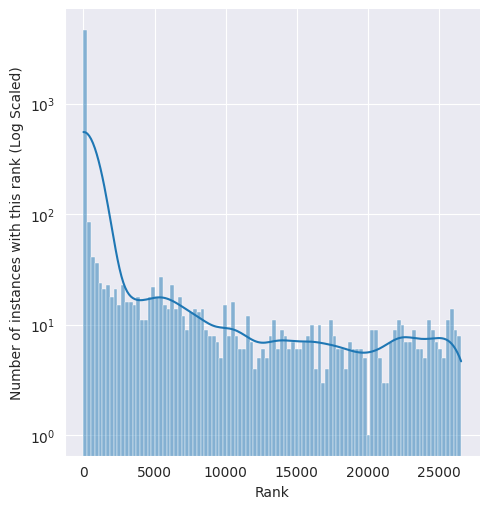

In [40]:
g = sns.displot(left_ranks.numpy(), kde=True, bins=100, log_scale=(False, True))
g.set_axis_labels("Rank","Number of instances with this rank (Log Scaled)")
g.set_title("Log Scaled Histogram of Ranks corresponding to every instance in valid set.")

/home/priyansh/Dev/perm/conda/envs/main/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


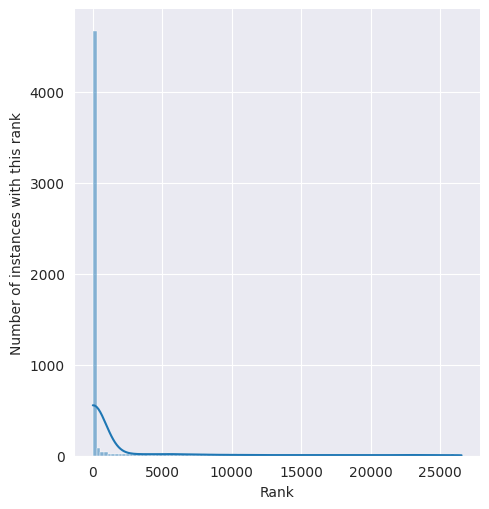

In [42]:
g = sns.displot(left_ranks.numpy(), kde=True, bins=100, log_scale=(False, False))
g.set_axis_labels("Rank","Number of instances with this rank")
g.set_titles("Log Scaled Histogram of Ranks corresponding to every instance in valid set.")

In [43]:
torch.mean(left_ranks)

tensor(1890.2013)